# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang saya gunakan merupakan dataset yang diberikan oleh kelas dicoding di kelas Belajar Machine Learning untuk Pemula yang berjudul bank transaction data.

    Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

    Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

    ## Fitur Utama

    - **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
    - **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
    - **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
    - **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
    - **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
    - **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
    - **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
    - **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
    - **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
    - **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
    - **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
    - **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
    - **`CustomerAge`**: Usia pemilik akun.  
    - **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
    - **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
    - **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
#Type your code here
import pandas as pd # Impor pustaka pandas untuk manipulasi dan analisis data
import numpy as np
import matplotlib.pyplot as plt # impor pustaka matplotlib untuk visualisasi data
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # untuk scaler dan encoding
import joblib
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
#Type your code here
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

# Cek 5 baris pertama dataset
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Mengecek informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan Statistika deskriptif dari dataset
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


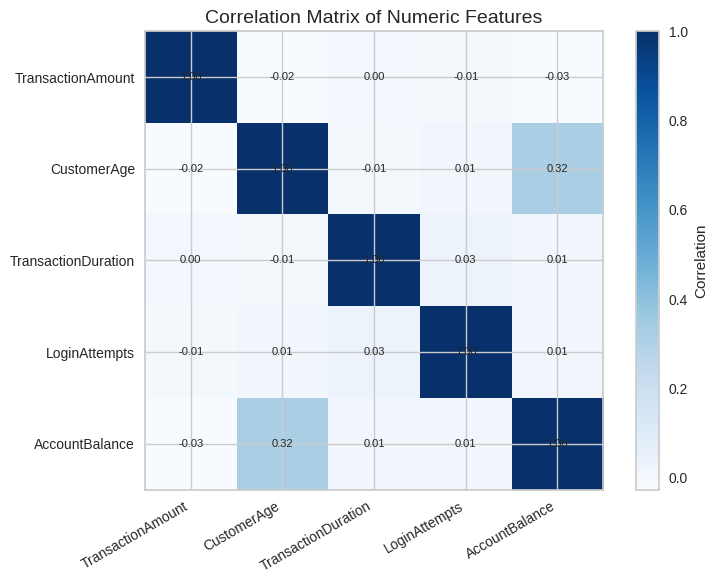

In [ ]:
# Menampilkan korelasi antar fitur
num_cols = df.select_dtypes(include=['number']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='Blues')
plt.colorbar(label='Correlation')
plt.xticks(np.arange(len(num_cols)), num_cols, rotation=30, ha='right')
plt.yticks(np.arange(len(num_cols)), num_cols)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)

# Tampilkan nilai di dalam kotak
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8)
plt.tight_layout()
plt.show()

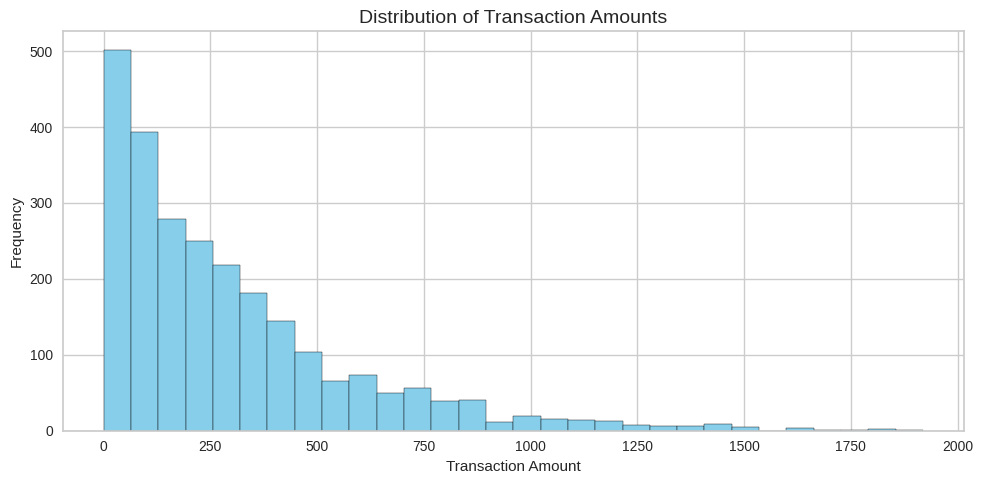

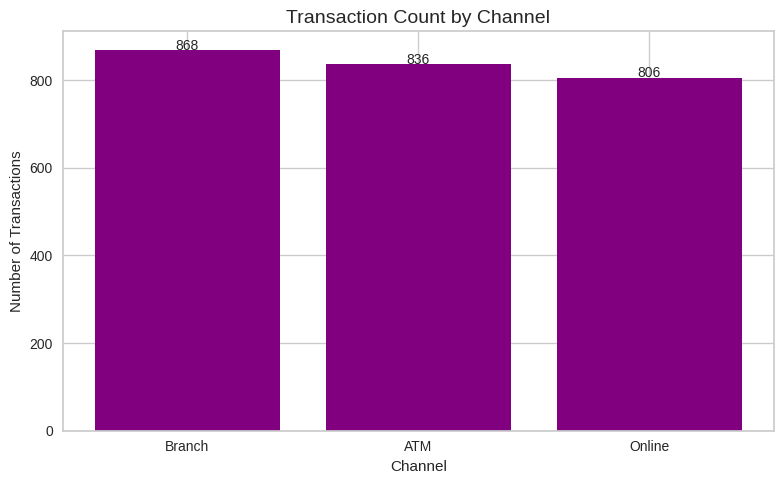

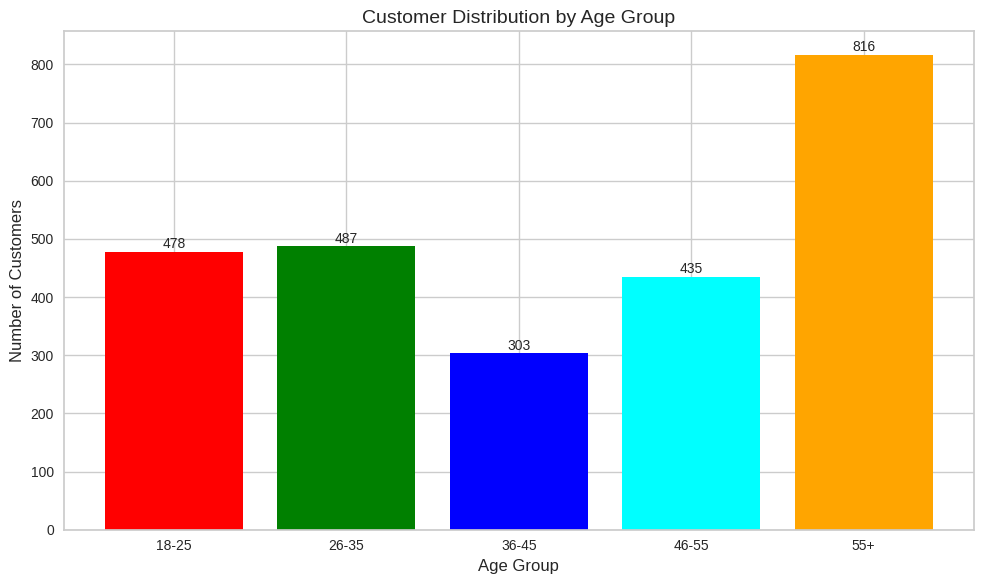

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Histogram transaction amounts
plt.figure(figsize=(10, 5))
plt.hist(df['TransactionAmount'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Transaction Amounts", fontsize=14)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

channel_counts = df['Channel'].value_counts()

# Histigram transaction count
plt.figure(figsize=(8, 5))
bars = plt.bar(channel_counts.index, channel_counts.values, color='purple')
plt.title("Transaction Count by Channel", fontsize=14)
plt.xlabel("Channel")
plt.ylabel("Number of Transactions")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)
plt.tight_layout()
plt.show()


# Histogram usia
df['CustomerAge'] = pd.to_numeric(df['CustomerAge'], errors='coerce')

age18_25 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 25)]
age26_35 = df.CustomerAge[(df.CustomerAge >= 26) & (df.CustomerAge <= 35)]
age36_45 = df.CustomerAge[(df.CustomerAge >= 36) & (df.CustomerAge <= 45)]
age46_55 = df.CustomerAge[(df.CustomerAge >= 46) & (df.CustomerAge <= 55)]
age55above = df.CustomerAge[df.CustomerAge >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [
    len(age18_25),
    len(age26_35),
    len(age36_45),
    len(age46_55),
    len(age55above)
]

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'cyan', 'orange']
bars = plt.bar(x, y, color=colors)

plt.title("Customer Distribution by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        str(int(bar.get_height())),
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

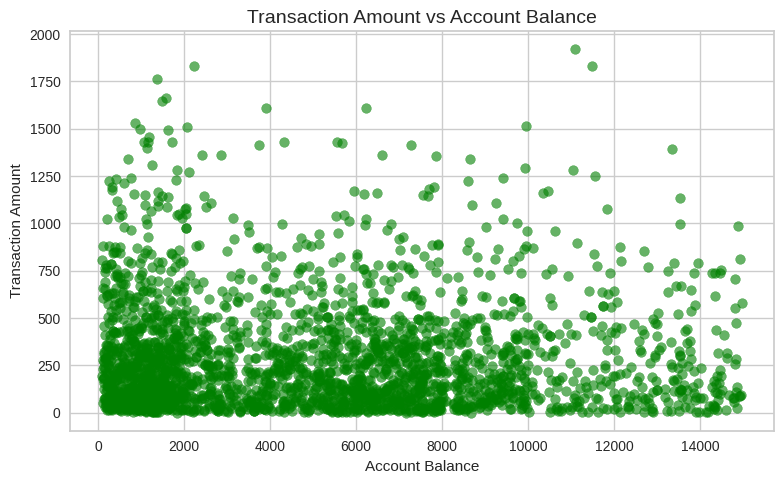

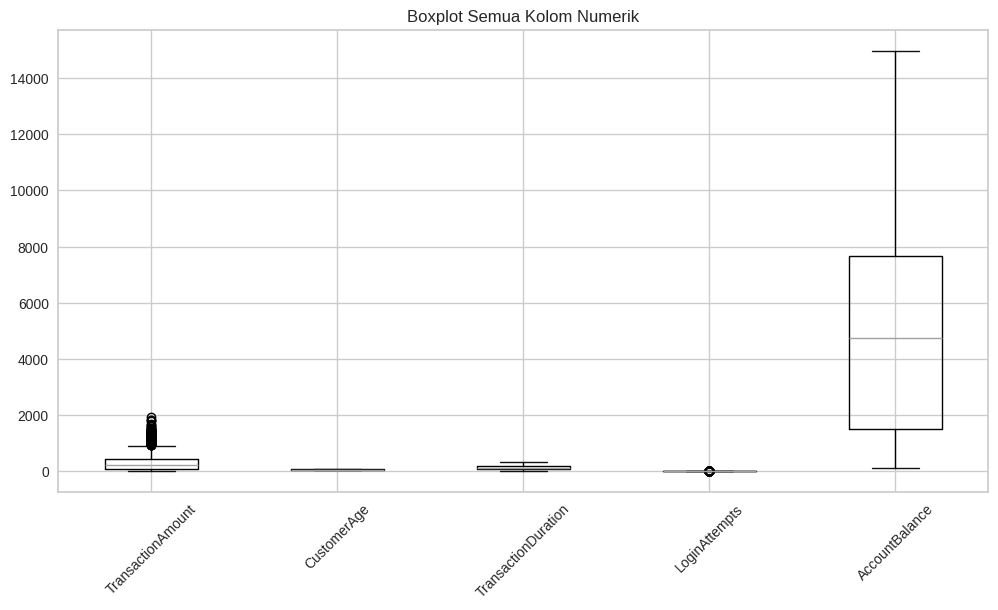

In [ ]:
# Scatter Plot Transaction Amount vs Account Balance
plt.figure(figsize=(8, 5))
plt.scatter(df['AccountBalance'], df['TransactionAmount'], alpha=0.6, c='green')
plt.title("Transaction Amount vs Account Balance", fontsize=14)
plt.xlabel("Account Balance")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()


# Boxplot kolom numerik
plt.figure(figsize=(12,6))
df.select_dtypes(include=['number']).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Semua Kolom Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Fitur numerik:", numeric_cols)

# Feature Scaling untuk data numerik
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop('IP Address', axis=1, inplace=True)
id_columns = [col for col in df.columns if 'id' in col.lower()]
df.drop(columns=id_columns, inplace=True)
print("Kolom ID yang di-drop:", id_columns)

# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

df.head()


# Menangani data yang hilang
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Imputasi median
for col in numeric_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    jumlah_outlier_sebelum = ((df[col] < batas_bawah) | (df[col] > batas_atas)).sum()

    median = df[col].median()
    df[col] = np.where((df[col] < batas_bawah) | (df[col] > batas_atas), median, df[col])

    jumlah_outlier_sesudah = ((df[col] < batas_bawah) | (df[col] > batas_atas)).sum()

    print(f"Kolom: {col}")
    print(f"  Jumlah outlier sebelum: {jumlah_outlier_sebelum}")
    print(f"  Jumlah outlier sesudah: {jumlah_outlier_sesudah}")



# BINNING DATASET
bins_age = [0, 18, 40, 60, np.inf]
labels_age = ["Remaja", "Dewasa Muda", "Dewasa", "Lansia"]

df["Age_Binned"] = pd.cut(
    df["CustomerAge"],
    bins=bins_age,
    labels=labels_age,
    include_lowest=True
)

df["Amount_Binned"] = pd.qcut(
    df["TransactionAmount"],
    q=4,
    labels=["Kecil", "Sedang", "Besar", "Sangat Besar"],
    duplicates="drop"   # menghindari error jika banyak nilai identik
)

le_age = LabelEncoder()
le_amount = LabelEncoder()

df["Age_Encoded"] = le_age.fit_transform(df["Age_Binned"].astype(str))
df["Amount_Encoded"] = le_amount.fit_transform(df["Amount_Binned"].astype(str))

print(df[[
    "CustomerAge", "Age_Binned", "Age_Encoded",
    "TransactionAmount", "Amount_Binned", "Amount_Encoded"
]].head(15))


Fitur numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Kolom ID yang di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID']
Kolom: TransactionAmount
  Jumlah outlier sebelum: 113
  Jumlah outlier sesudah: 0
Kolom: CustomerAge
  Jumlah outlier sebelum: 0
  Jumlah outlier sesudah: 0
Kolom: TransactionDuration
  Jumlah outlier sebelum: 0
  Jumlah outlier sesudah: 0
Kolom: LoginAttempts
  Jumlah outlier sebelum: 120
  Jumlah outlier sesudah: 0
Kolom: AccountBalance
  Jumlah outlier sebelum: 0
  Jumlah outlier sesudah: 0
    CustomerAge Age_Binned  Age_Encoded  TransactionAmount Amount_Binned  \
0      0.838710     Remaja            0           0.007207         Kecil   
1      0.806452     Remaja            0           0.195940  Sangat Besar   
2      0.016129     Remaja            0           0.065680        Sedang   
3      0.129032     Remaja            0           0.096016        Sedang   
4      0.435484     Remaja      

In [ ]:
#Menyimpan Hasil Pre-processing
df.to_csv('preprocessed_data.csv', index=False)
print('Data preprocessing sudah disimpan')

Data preprocessing telah berhasil disimpan ke preprocessed_data.csv
